In [5]:
from datasets.config import MnistDataModuleConfig
from datasets.mnist import MnistDataModule
import torch_geometric
import networkx as nx
dataset = MnistDataModule(MnistDataModuleConfig())

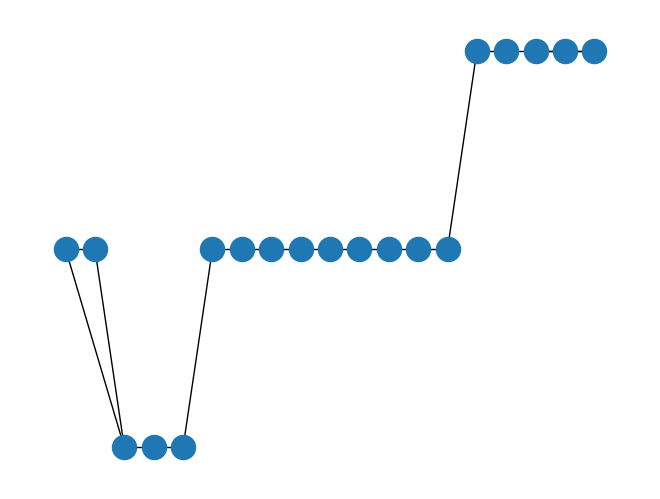

In [9]:
data = dataset.entire_ds[6]

g = torch_geometric.utils.to_networkx(data, to_undirected=True)
nx.draw(g,pos=data.x.numpy())


In [ ]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, GaussianBlur 
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
from datasets.transforms import CenterTransform
from torch_geometric.transforms import FaceToEdge , KNNGraph
import torch
from torch_geometric.utils import degree
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import torchvision
import vedo
from layers.ect import EctLayer
from layers.config import EctConfig
from torch_geometric.data import Batch, Data

from torch.utils.data import DataLoader

import numpy as np


class SkeletonGraph:
    def __init__(self):
        self.tr = torchvision.transforms.ToTensor()
        self.knn = KNNGraph(k=2,force_undirected=True)
        self.lin = torch.linspace(-1, 1, 28)

    def __call__(self, data):
        image, y = data
        # perform skeletonization
        skeleton = skeletonize(image.squeeze().numpy())
        coordinates = np.where(skeleton>.5)
        x_hat = torch.vstack(
        [self.lin[coordinates[0]].squeeze(), self.lin[coordinates[1]].squeeze()]
        ).T
        
        data = Data(
            pos = x_hat,
            x = x_hat,
            y = y
        )
        data = self.knn(data)
        data.pos = None
        return data


transform = Compose(
            [
                SkeletonGraph(),
            ]
        )

dataset = MNIST(root="./data/MNISTVanilla",transform=ToTensor())
dataloader = DataLoader(dataset)

for data in dataloader:
    res = transform(data)
    print(res)
    break